# Capstone - Week 5 - part 2

## Paris -  Neighberhood cluster


### Probleme behaviour

Paris (nicknamed the "City of light") is the capital city of France, and the largest city in France, Paris is also the center of French economy, politics, traffic and culture. Paris has many art museums(206) and historical buildings(2185). As a traffic center, Paris has a very good underground subway system (called the Metro),there are also 12,000 restaurants, 437 gardens.

The insights derived from analysis will give good understanding of the **tourism agency environment** which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

### Probleme description

As a tourism agency we need to know which neighberhood are the same to **optimise the customer journey** :
- select **days by neighbourhood theme** that maximise the number of sight seeing 
- making the trip more profitable for the customer and therefore for the agencies too. 
- to make the visit more coherent with the places visited 

### Target Audience


My Client is a tourism agency, so I will focus on Paris borough during my analysis. The objective is to determin the  4 types of  neighborhood of paris city . The Management also expects to understand the following points: 

- how many Boroughs and neighberhoods are in paris.
- how much neighberhoods are in each cluster.
- what are the particularities of each cluster.
- What are the best 5 cluster to visit

This would interest anyone who wants to start an agency in Paris, and also someone how want to have a good journey in Paris.



## 1- importing the requered librarys

In [99]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors


#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## 2- data importing and description

### 2.1- the data for paris borough, Neighborhood, coordonates from the official web site of the Paris town :
https://opendata.paris.fr/explore/dataset/quartier_paris/information/

In [2]:
df=pd.read_csv("quartier_paris.csv",sep=";")

In [3]:
df.head()

N_SQ_QU  C_QU  C_QUINSEE            L_QU  C_AR    N_SQ_AR    PERIMETRE  \
0  750000021    21    7510601         Monnaie     6  750000006  2391.122818   
1  750000022    22    7510602           Odéon     6  750000006  3516.314464   
2  750000029    29    7510801  Champs-Elysées     8  750000008  5480.652870   
3  750000051    51    7511303  Maison-Blanche    13  750000013  6814.373288   
4  750000052    52    7511304     Croulebarbe    13  750000013  3289.230480   

        SURFACE                 Geometry X Y  \
0  2.933606e+05  48.8543844036,2.34003537113   
1  7.161484e+05  48.8478006293,2.33633882759   
2  1.140254e+06  48.8670744922,2.30865168468   
3  2.231506e+06  48.8231278057,2.35243314954   
4  6.920677e+05  48.8337336761,2.34767304607   

                                            Geometry  
0  {"type": "Polygon", "coordinates": [[[2.343168...  
1  {"type": "Polygon", "coordinates": [[[2.336988...  
2  {"type": "Polygon", "coordinates": [[[2.306463...  
3  {"type": "Polygon", "coordinates": [[[2.349115...  
4  {"type": "Polygon", "coordinates": [[[2.351662...

### 2.2- selecting the data that interest us:
 - **Geometry X Y**	: contain latitude and longitude of Neighborhood, we need to split this column into tow (longitude of latitude)
 - **L_QU** : contain the name of the Neighborhood
 - **C_AR** : containe the borough of each Neighborhood , you can check on the wiki page to know more about Paris :
 https://en.wikipedia.org/wiki/Quarters_of_Paris

In [4]:
df1=df[['L_QU','C_AR']]

In [5]:
df1['latitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[0])
df1['longitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[1])

<ipython-input-5-0dda3f2cf8d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[0])
<ipython-input-5-0dda3f2cf8d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['longitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[1])


### 2.3- Paris coordonates using geolocator

In [6]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


### 2.4- Making latitude and longitude float type

In [7]:
df1['latitude']=df1['latitude'].astype('float64')
df1['longitude']=df1['longitude'].astype('float64')
df1

<ipython-input-7-4e6c14395472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latitude']=df1['latitude'].astype('float64')
<ipython-input-7-4e6c14395472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['longitude']=df1['longitude'].astype('float64')


L_QU  C_AR   latitude  longitude
0          Monnaie     6  48.854384   2.340035
1            Odéon     6  48.847801   2.336339
2   Champs-Elysées     8  48.867074   2.308652
3   Maison-Blanche    13  48.823128   2.352433
4      Croulebarbe    13  48.833734   2.347673
..             ...   ...        ...        ...
75    Clignancourt    18  48.891668   2.345979
76     Goutte-d'Or    18  48.892138   2.355536
77    Rochechouart     9  48.879812   2.344861
78           Bercy    12  48.835209   2.386210
79          Halles     1  48.862289   2.344899

[80 rows x 4 columns]

### 2.5- Neighborhood of paris on map

In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df1['latitude'], df1['longitude'], df1['C_AR'], df1['L_QU']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 2.6- Getting 30 first venues of each neighberhood on data frame
#### foursquare credentials

In [9]:
CLIENT_ID = '54KLDE4RKR1GUX2NM1CIRTXXZVQOEEHRBIPZ2WSI4JDJFRUB' # your Foursquare ID
CLIENT_SECRET = 'BHQIWNOEBWZQ2VLHADSC0YIKUUEHUO5YS4BFAKFP41URSI04' # your Foursquare Secret
ACCESS_TOKEN = 'YJSOHJD14FQFTQ0HDCSBPAS2SAUX3Z031NCH5YFDJCSWPN2K' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 30 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 54KLDE4RKR1GUX2NM1CIRTXXZVQOEEHRBIPZ2WSI4JDJFRUB
CLIENT_SECRET:BHQIWNOEBWZQ2VLHADSC0YIKUUEHUO5YS4BFAKFP41URSI04


### 2.7- getNearbyVenues function : make serach venues on each Neighborhood

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
paris_venues = getNearbyVenues(names=df1['L_QU'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

Monnaie
Odéon
Champs-Elysées
Maison-Blanche
Croulebarbe
Sainte-Avoie
Hôpital-Saint-Louis
Belleville
Ternes
Folie-Méricourt
Salpêtrière
Place-Vendôme
Combat
Charonne
Javel
Ecole-Militaire
Grenelle
Auteuil
Quinze-Vingts
Saint-Gervais
Saint-Thomas-d'Aquin
Porte-Saint-Denis
Saint-Germain-l'Auxerrois
Villette
Arts-et-Métiers
Archives
Faubourg-du-Roule
Arsenal
Jardin-des-Plantes
Porte-Saint-Martin
Roquette
Picpus
Plaisance
Invalides
Faubourg-Montmartre
Gaillon
Amérique
Saint-Merri
Notre-Dame
Gros-Caillou
Vivienne
Enfants-Rouges
Saint-Germain-des-Prés
Saint-Vincent-de-Paul
Saint-Ambroise
Bel-Air
Montparnasse
Plaine de Monceaux
Europe
Sainte-Marguerite
Parc-de-Montsouris
Saint-Lambert
Val-de-Grâce
Necker
Père-Lachaise
La Chapelle
Saint-Victor
Madeleine
Saint-Fargeau
Porte-Dauphine
Grandes-Carrières
Batignolles
Notre-Dame-des-Champs
Petit-Montrouge
Pont-de-Flandre
Muette
Chaillot
Epinettes
Sorbonne
Saint-Georges
Chaussée-d'Antin
Palais-Royal
Mail
Bonne-Nouvelle
Gare
Clignancourt
Goutte-d'Or
Roc

### 2.8- Our final dataframe contain the following data:

- paris Neighborhood
- Neighborhood Latitude	
- Neighborhood Longitude	
- Venue
- Venue Latitude	
- Venue Longitude	
- Venue Category


In [12]:
paris_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Monnaie              48.854384                2.340035   
1         Monnaie              48.854384                2.340035   
2         Monnaie              48.854384                2.340035   
3         Monnaie              48.854384                2.340035   
4         Monnaie              48.854384                2.340035   
...           ...                    ...                     ...   
2202       Halles              48.862289                2.344899   
2203       Halles              48.862289                2.344899   
2204       Halles              48.862289                2.344899   
2205       Halles              48.862289                2.344899   
2206       Halles              48.862289                2.344899   

                      Venue  Venue Latitude  Venue Longitude  \
0                 Chez Nous       48.855823         2.340271   
1          Chez Le Libanais       48.853285         2.341673   
2            Maison Sauvage       48.853744         2.337993   
3             Taschen Store       48.853750         2.338162   
4        Ze Kitchen Galerie       48.855101         2.341297   
...                     ...             ...              ...   
2202      LECLAIREUR Hérold       48.864832         2.341530   
2203            Tir-Bouchon       48.864648         2.348728   
2204         Le Pot de Vins       48.864322         2.340193   
2205  Passage du Grand Cerf       48.864760         2.349486   
2206                   Grom       48.866055         2.347095   

           Venue Category  
0                Wine Bar  
1     Lebanese Restaurant  
2       French Restaurant  
3               Bookstore  
4              Restaurant  
...                   ...  
2202       Clothing Store  
2203    French Restaurant  
2204           Restaurant  
2205     Pedestrian Plaza  
2206       Ice Cream Shop  

[2207 rows x 7 columns]

## 3- Data analyses

### 3.1- Groupe data by Neighborhood

In [50]:
df_Neighbor_grouped=paris_venues.groupby('Neighborhood').count().reset_index()


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 2160x1440 with 0 Axes>

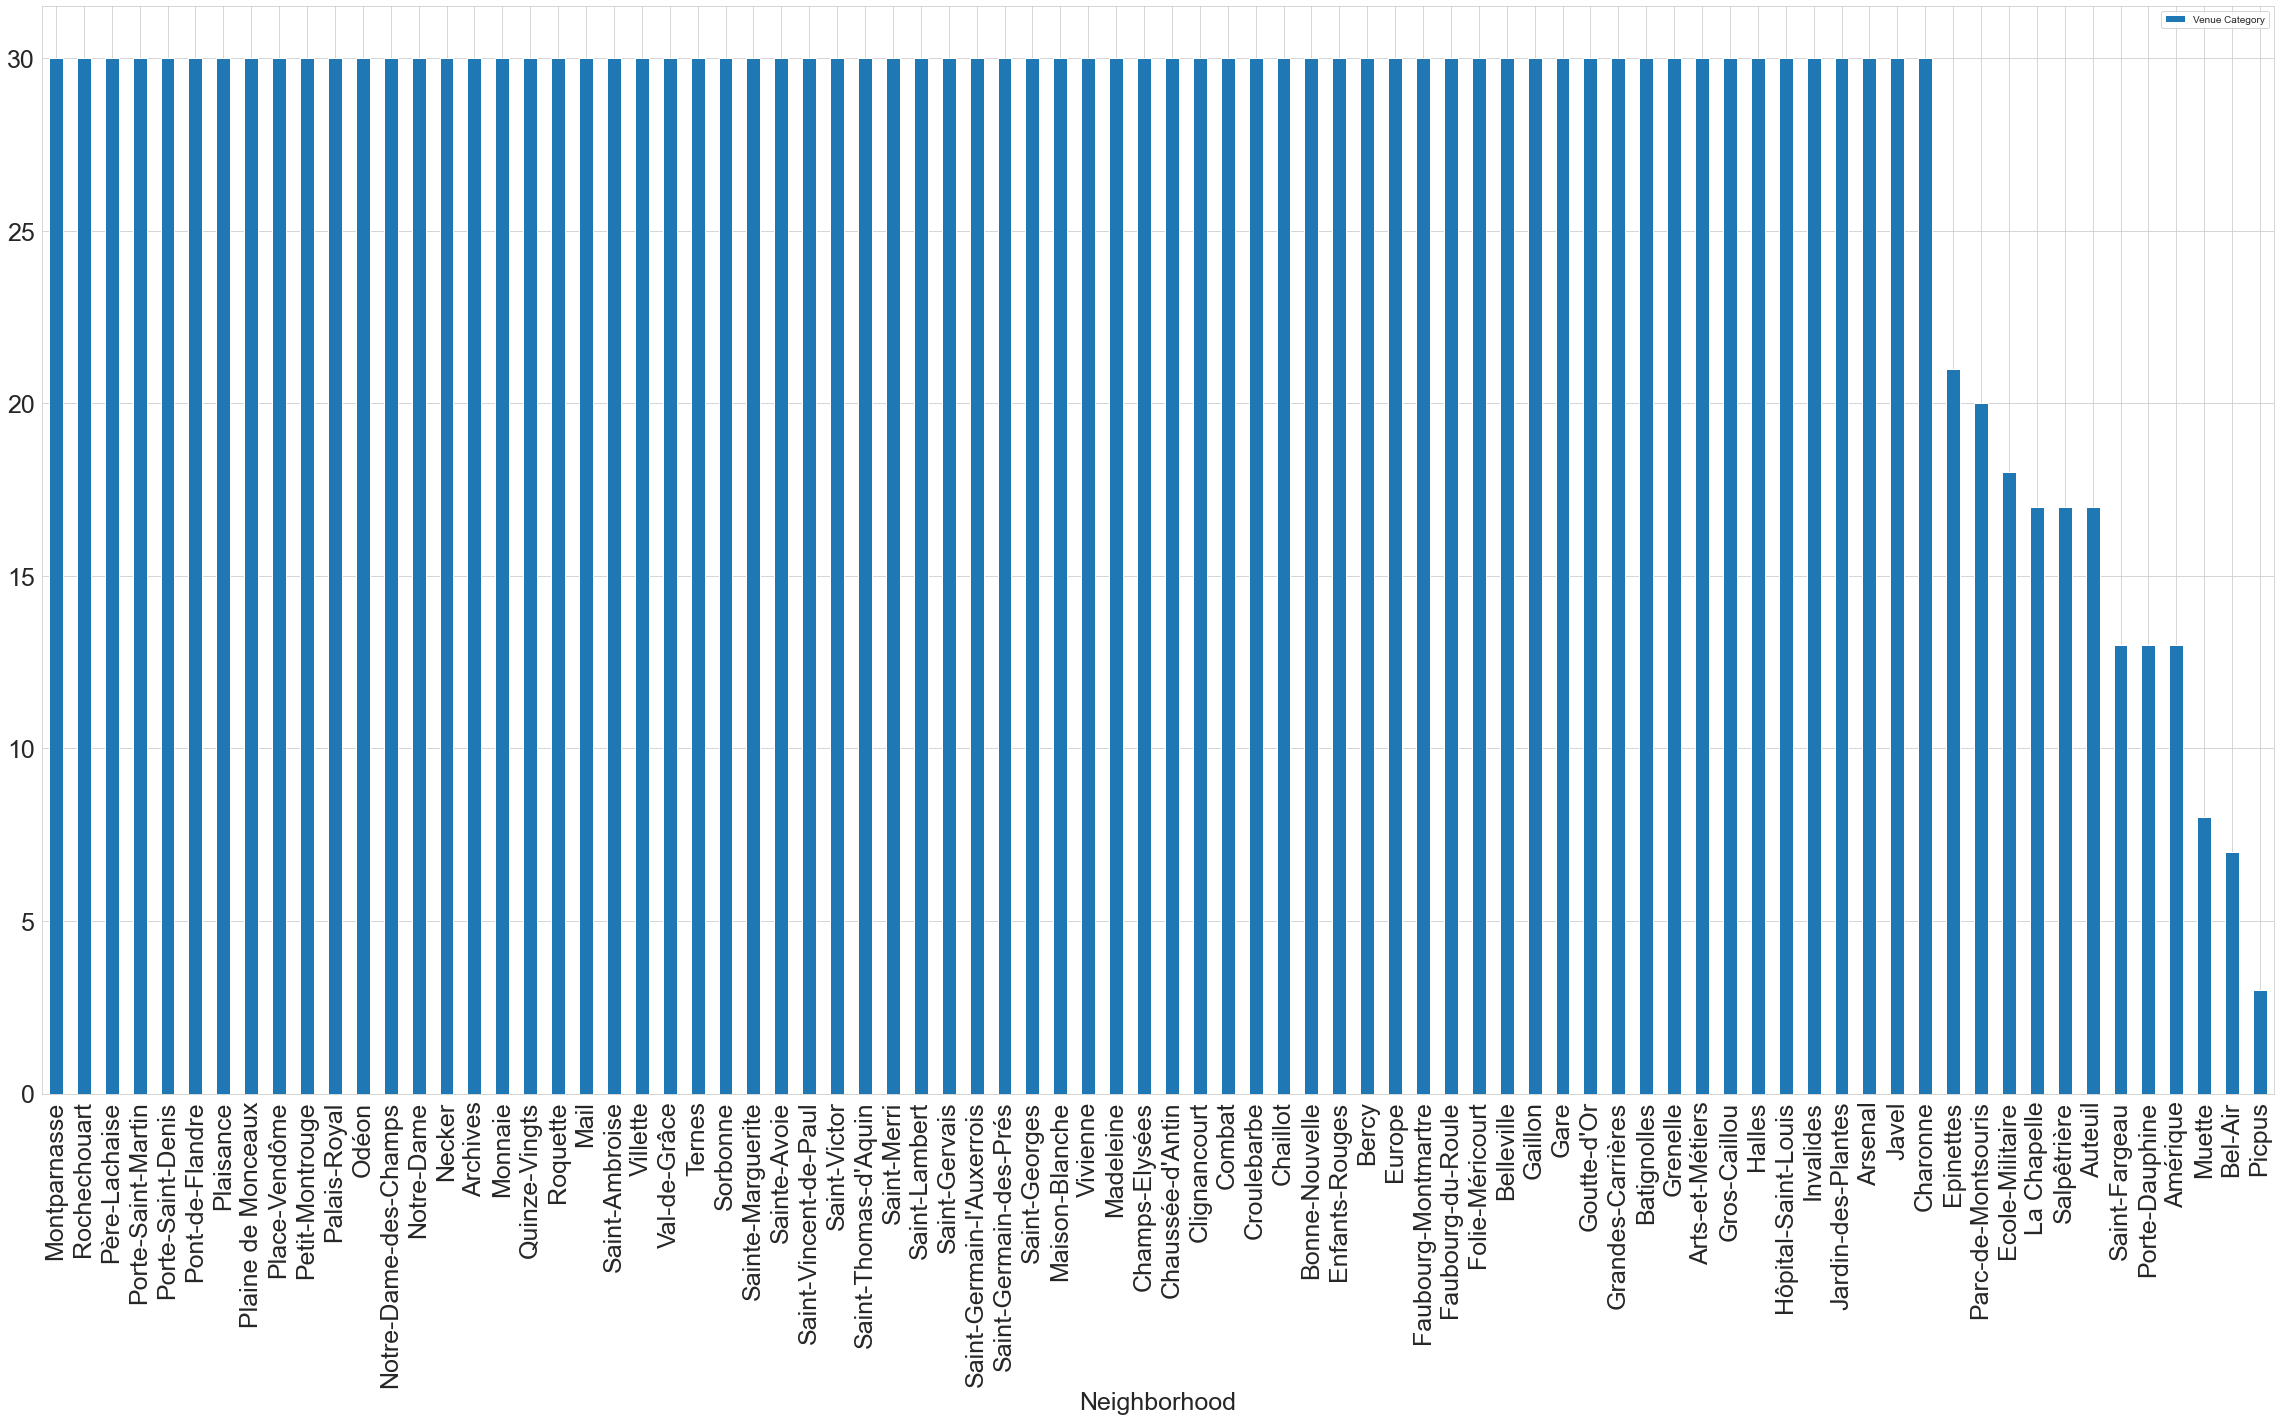

In [49]:
import seaborn as sns
sns.set_style("whitegrid")
figure=plt.figure(figsize=(30,20))
df_Neighbor_grouped.sort_values(by='Venue Category',ascending=False).plot.bar(x='Neighborhood',y='Venue Category',figsize=(40,20))
plt.xlabel("Neighborhood",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

 - There are 30 venues for each Neighborhood exept 12 of them , this because they are small ones.
 - the data are consistent across the rest of the neighbourhoods.


### 3.2- Group data by Venues cathegory

In [47]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 241 uniques categories.


In [65]:
df_categ_grouped=paris_venues.groupby('Venue Category').count().reset_index().sort_values(by='Neighborhood',ascending=False)


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 2160x1440 with 0 Axes>

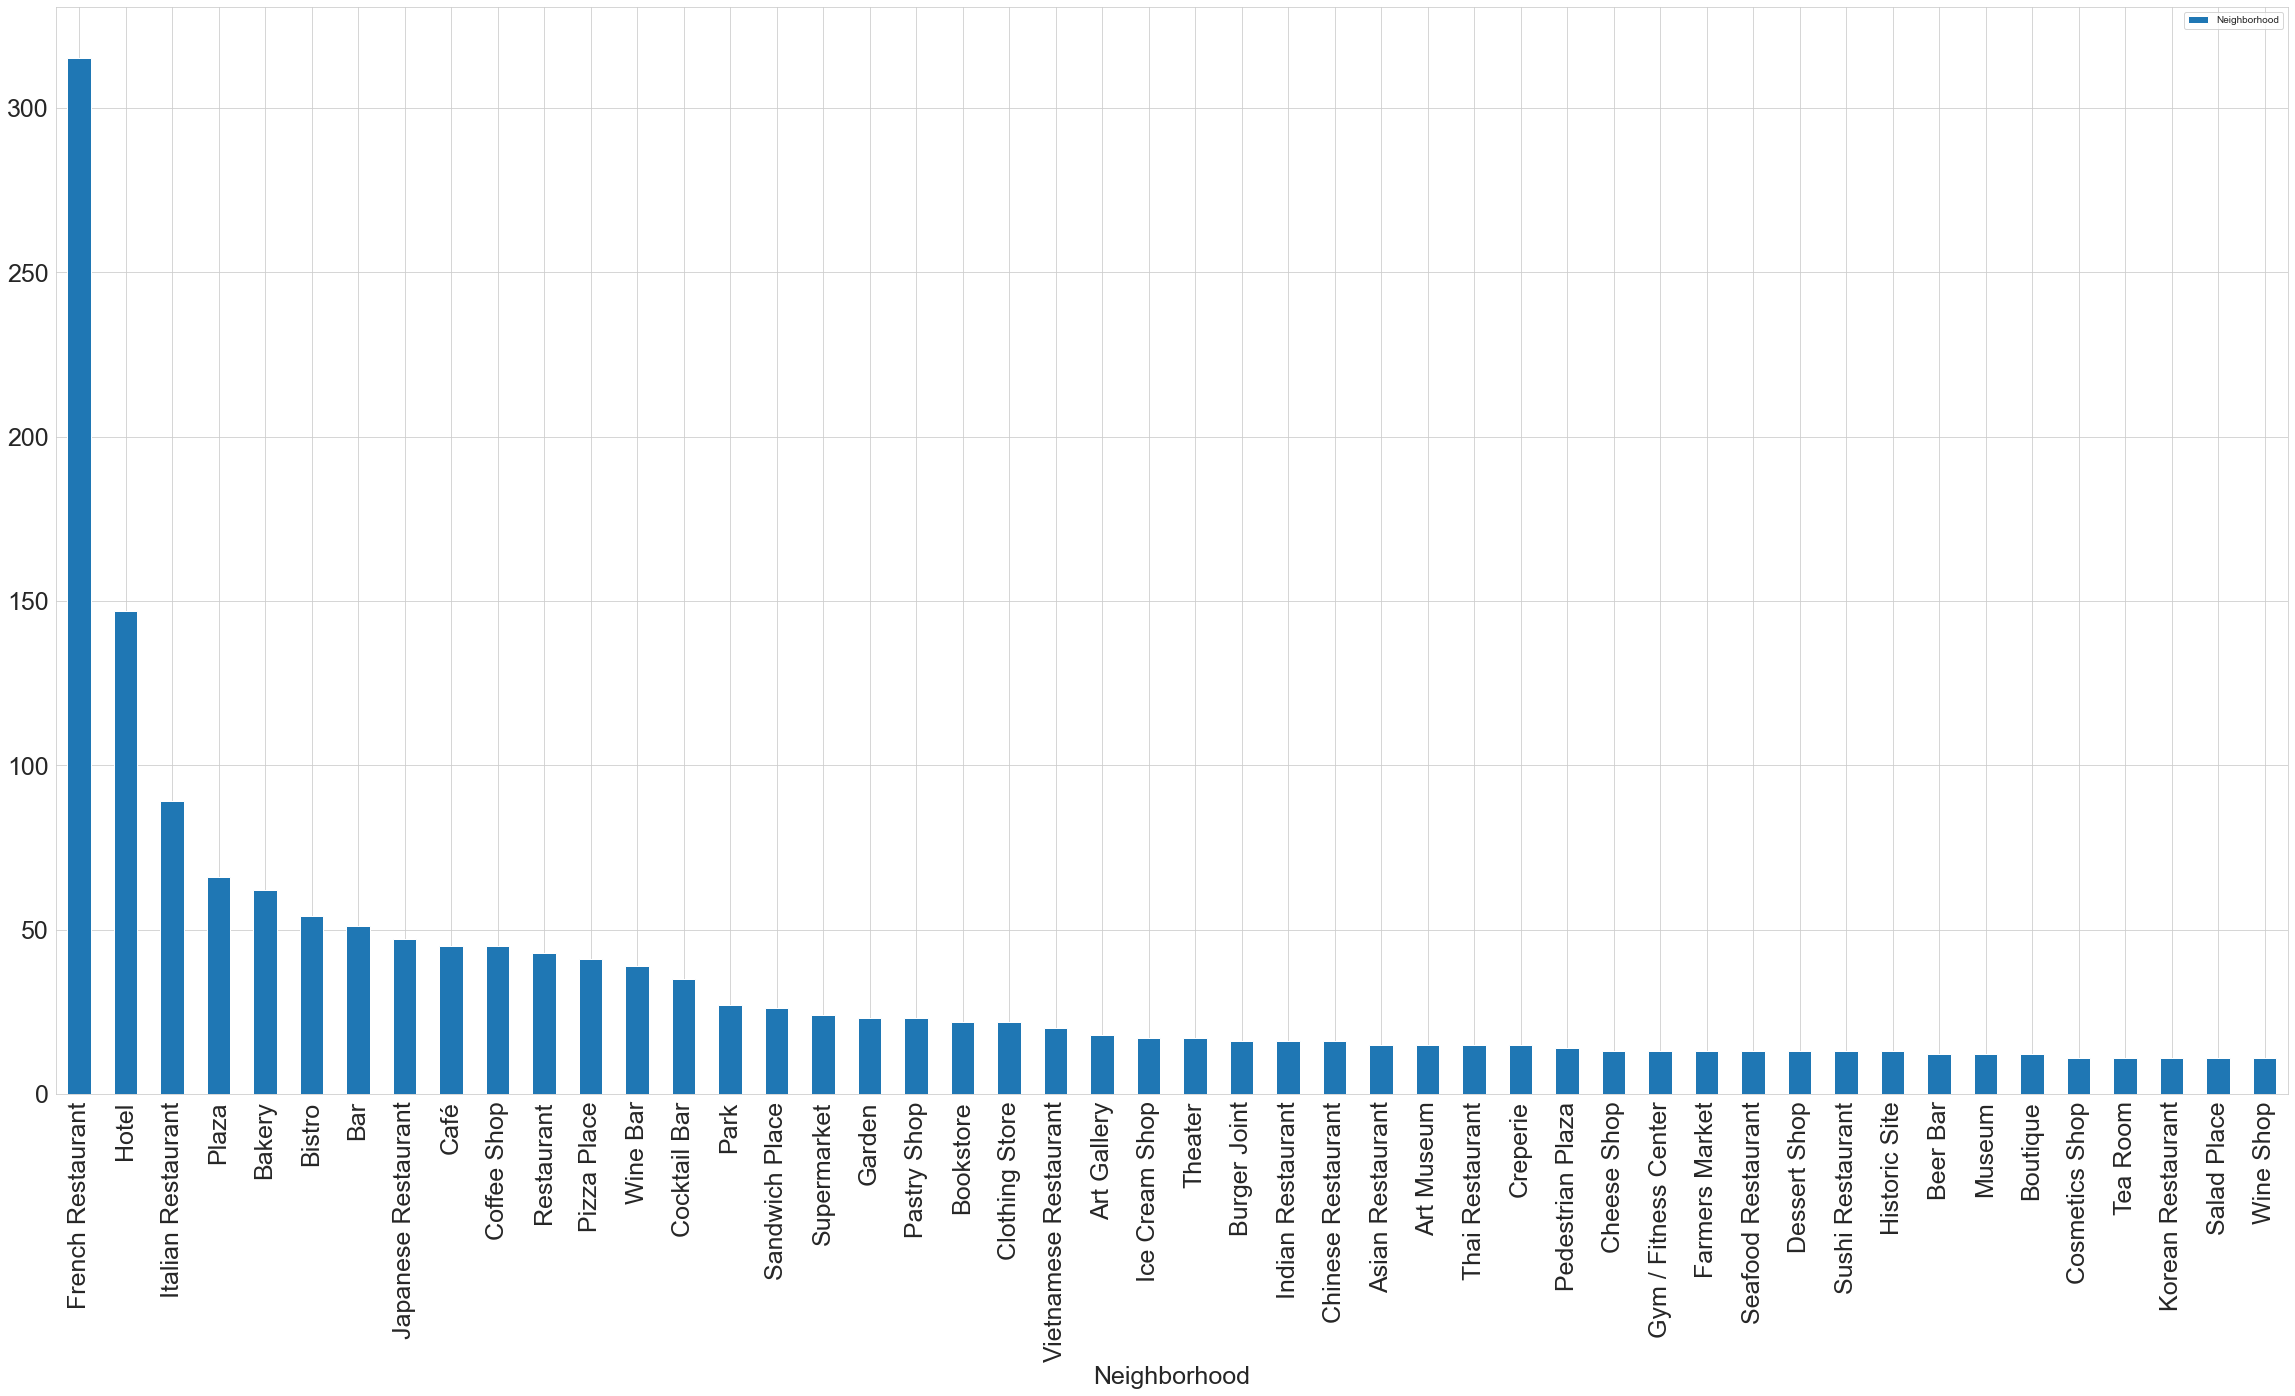

In [59]:
import seaborn as sns
sns.set_style("whitegrid")
figure=plt.figure(figsize=(30,20))
df_categ_grouped[df_categ_grouped['Neighborhood']>10].plot.bar(x='Venue Category',y='Neighborhood',figsize=(40,20))
plt.xlabel("Neighborhood",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

 - **Top 10 Category show that the most Paris have  à lot of restaurant, Hotel, Bar**

In [108]:
df_categ_grouped[df_categ_grouped['Neighborhood']>10][['Venue Category','Neighborhood']].head(10)

Venue Category  Neighborhood
90     French Restaurant           315
111                Hotel           147
117   Italian Restaurant            89
174                Plaza            66
16                Bakery            62
25                Bistro            54
17                   Bar            51
118  Japanese Restaurant            47
42                  Café            45
55           Coffee Shop            45

In [126]:
paris_venues=paris_venues[paris_venues['Venue Category']!='French Restaurant']

### 3.3- Analyze Each Neighborhood

In [127]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0      Monnaie                  0                  0                   0   
1      Monnaie                  0                  0                   0   
3      Monnaie                  0                  0                   0   
4      Monnaie                  0                  0                   0   
5      Monnaie                  0                  0                   0   

   Alsatian Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0                    0                    0             0                 0   
1                    0                    0             0                 0   
3                    0                    0             0                 0   
4                    0                    0             0                 0   
5                    0                    0             0                 0   

   Argentinian Restaurant  Art Gallery  ...  Turkish Restaurant  \
0                       0            0  ...                   0   
1                       0            0  ...                   0   
3                       0            0  ...                   0   
4                       0            0  ...                   0   
5                       0            0  ...                   0   

   Udon Restaurant  Vegetarian / Vegan Restaurant  Video Game Store  \
0                0                              0                 0   
1                0                              0                 0   
3                0                              0                 0   
4                0                              0                 0   
5                0                              0                 0   

   Vietnamese Restaurant  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0                      0         1          0              0            0   
1                      0         0          0              0            0   
3                      0         0          0              0            0   
4                      0         0          0              0            0   
5                      0         0          0              0            0   

   Zoo Exhibit  
0            0  
1            0  
3            0  
4            0  
5            0  

[5 rows x 241 columns]

#### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:


In [128]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0          Amérique                0.0                0.0                 0.0   
1          Archives                0.0                0.0                 0.0   
2           Arsenal                0.0                0.0                 0.0   
3   Arts-et-Métiers                0.0                0.0                 0.0   
4           Auteuil                0.0                0.0                 0.0   
..              ...                ...                ...                 ...   
75         Sorbonne                0.0                0.0                 0.0   
76           Ternes                0.0                0.0                 0.0   
77     Val-de-Grâce                0.0                0.0                 0.0   
78         Villette                0.0                0.0                 0.0   
79         Vivienne                0.0                0.0                 0.0   

    Alsatian Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0                   0.0             0.000000           0.0               0.0   
1                   0.0             0.000000           0.0               0.0   
2                   0.0             0.000000           0.0               0.0   
3                   0.0             0.000000           0.0               0.0   
4                   0.0             0.000000           0.0               0.0   
..                  ...                  ...           ...               ...   
75                  0.0             0.000000           0.0               0.0   
76                  0.0             0.041667           0.0               0.0   
77                  0.0             0.000000           0.0               0.0   
78                  0.0             0.000000           0.0               0.0   
79                  0.0             0.000000           0.0               0.0   

    Argentinian Restaurant  Art Gallery  ...  Turkish Restaurant  \
0                 0.000000     0.000000  ...            0.000000   
1                 0.000000     0.100000  ...            0.000000   
2                 0.000000     0.000000  ...            0.000000   
3                 0.038462     0.038462  ...            0.000000   
4                 0.000000     0.000000  ...            0.000000   
..                     ...          ...  ...                 ...   
75                0.000000     0.000000  ...            0.000000   
76                0.000000     0.000000  ...            0.000000   
77                0.000000     0.000000  ...            0.038462   
78                0.000000     0.000000  ...            0.000000   
79                0.000000     0.000000  ...            0.000000   

    Udon Restaurant  Vegetarian / Vegan Restaurant  Video Game Store  \
0               0.0                       0.000000               0.0   
1               0.0                       0.000000               0.0   
2               0.0                       0.041667               0.0   
3               0.0                       0.038462               0.0   
4               0.0                       0.000000               0.0   
..              ...                            ...               ...   
75              0.0                       0.000000               0.0   
76              0.0                       0.000000               0.0   
77              0.0                       0.000000               0.0   
78              0.0                       0.000000               0.0   
79              0.0                       0.000000               0.0   

    Vietnamese Restaurant  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0                0.000000  0.000000   0.000000            0.0          0.0   
1                0.000000  0.000000   0.000000            0.0          0.0   
2                0.000000  0.041667   0.000000            0.0          0.0   
3                0.115385  0.000000   0.000000            0.0          0.0   
4

#### top 5 most common venues for each Neighborhood : 

In [129]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
               venue  freq
0        Supermarket  0.18
1  Health Food Store  0.09
2    Bed & Breakfast  0.09
3               Park  0.09
4               Pool  0.09


----Archives----
                    venue  freq
0          Clothing Store  0.17
1             Art Gallery  0.10
2         Cultural Center  0.03
3                  Bakery  0.03
4  Okonomiyaki Restaurant  0.03


----Arsenal----
                  venue  freq
0         Boat or Ferry  0.08
1                 Plaza  0.08
2    Italian Restaurant  0.08
3          Cocktail Bar  0.08
4  Brazilian Restaurant  0.04


----Arts-et-Métiers----
                   venue  freq
0  Vietnamese Restaurant  0.12
1             Restaurant  0.08
2     Chinese Restaurant  0.08
3                    Bar  0.08
4     Italian Restaurant  0.08


----Auteuil----
                   venue  freq
0           Tennis Court  0.31
1                 Garden  0.12
2                Stadium  0.12
3                  Plaza  0.06
4  Outdoors & Recreation  0

## 4- Cluster Neighborhoods

### 4.1- most commun venues by Neighborhood

In [130]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [131]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0         Amérique            Supermarket                  Pool   
1         Archives         Clothing Store           Art Gallery   
2          Arsenal                  Plaza    Italian Restaurant   
3  Arts-et-Métiers  Vietnamese Restaurant    Italian Restaurant   
4          Auteuil           Tennis Court               Stadium   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0                Bistro        Bed & Breakfast                  Park   
1          Gourmet Shop            Men's Store        Farmers Market   
2          Cocktail Bar          Boat or Ferry                   Pub   
3                Bakery     Chinese Restaurant            Restaurant   
4                Garden  Outdoors & Recreation   Sporting Goods Shop   

  6th Most Common Venue   7th Most Common Venue    8th Most Common Venue  \
0                  Café       Health Food Store         Basketball Court   
1    Falafel Restaurant  Okonomiyaki Restaurant  Scandinavian Restaurant   
2      Tapas Restaurant        Pedestrian Plaza                     Park   
3                   Bar                   Hotel                   Museum   
4                Museum                  Office               Racecourse   

  9th Most Common Venue         10th Most Common Venue  
0              Bus Stop                          Plaza  
1        Sandwich Place            Japanese Restaurant  
2           Opera House                         Museum  
3              Beer Bar  Vegetarian / Vegan Restaurant  
4      Botanical Garden                          Plaza

### 4.2- Clustering

In [133]:
# set number of clusters
kclusters = 10

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([8, 7, 1, 8, 3, 2, 4, 2, 1, 7])

In [134]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() # check the last columns!

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Monnaie              48.854384                2.340035   
1      Monnaie              48.854384                2.340035   
3      Monnaie              48.854384                2.340035   
4      Monnaie              48.854384                2.340035   
5      Monnaie              48.854384                2.340035   

                        Venue  Venue Latitude  Venue Longitude  \
0                   Chez Nous       48.855823         2.340271   
1            Chez Le Libanais       48.853285         2.341673   
3               Taschen Store       48.853750         2.338162   
4          Ze Kitchen Galerie       48.855101         2.341297   
5  Prescription Cocktail Club       48.854921         2.337768   

        Venue Category  Cluster Labels 1st Most Common Venue  \
0             Wine Bar               7                 Plaza   
1  Lebanese Restaurant               7                 Plaza   
3            Bookstore               7                 Plaza   
4           Restaurant               7                 Plaza   
5         Cocktail Bar               7                 Plaza   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0        Sandwich Place          Cocktail Bar    Italian Restaurant   
1        Sandwich Place          Cocktail Bar    Italian Restaurant   
3        Sandwich Place          Cocktail Bar    Italian Restaurant   
4        Sandwich Place          Cocktail Bar    Italian Restaurant   
5        Sandwich Place          Cocktail Bar    Italian Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0              Wine Bar    Seafood Restaurant     Breton Restaurant   
1              Wine Bar    Seafood Restaurant     Breton Restaurant   
3              Wine Bar    Seafood Restaurant     Breton Restaurant   
4              Wine Bar    Seafood Restaurant     Breton Restaurant   
5              Wine Bar    Seafood Restaurant     Breton Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0              Tea Room                  Café             Restaurant  
1              Tea Room                  Café             Restaurant  
3              Tea Room                  Café             Restaurant  
4              Tea Room                  Café             Restaurant  
5              Tea Room                  Café             Restaurant

### 4.3- Map clusters

In [135]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Venue Latitude'], paris_merged['Venue Longitude'],paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5- Clusters analyses

### 5.1- cluster 1

In [136]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude                 Venue Category  \
437              48.850359         2.312234                    Pastry Shop   
438              48.850359         2.310269                 Farmers Market   
439              48.850359         2.310133                         Bistro   
441              48.850359         2.309619                          Hotel   
442              48.850359         2.312418               Asian Restaurant   
443              48.850359         2.311581                          Plaza   
444              48.850359         2.308695                          Hotel   
446              48.850359         2.311720                         Garden   
447              48.850359         2.313893                           Café   
449              48.850359         2.312343                          Plaza   
450              48.850359         2.307064                   Dessert Shop   
451              48.850359         2.311734                          Diner   
452              48.850359         2.307415                          Hotel   
453              48.850359         2.307819                          Hotel   
454              48.850359         2.307911                          Hotel   
895              48.830317         2.314705                         Bistro   
896              48.830317         2.316201          Vietnamese Restaurant   
898              48.830317         2.314535                         Bistro   
899              48.830317         2.316590                     Beer Store   
900              48.830317         2.315085                          Hotel   
902              48.830317         2.316397                          Hotel   
903              48.830317         2.316948                          Hotel   
905              48.830317         2.315829              Korean Restaurant   
906              48.830317         2.316604                    Music Venue   
907              48.830317         2.316882                          Hotel   
908              48.830317         2.311372                         Bakery   
909              48.830317         2.315956                    Pizza Place   
910              48.830317         2.315692  Vegetarian / Vegan Restaurant   
911              48.830317         2.319938      Latin American Restaurant   
913              48.830317         2.318541               Sushi Restaurant   
915              48.830317         2.316920            Japanese Restaurant   
917              48.830317         2.315296                          Hotel   
918              48.830317         2.317136                Thai Restaurant   
919              48.830317         2.311784                         Bistro   
920              48.830317         2.318226                            Bar   
921              48.830317         2.317658                          Hotel   
922              48.830317         2.317457                     Restaurant   
923              48.830317         2.317697                          Hotel   
924              48.830317         2.319116                          Hotel   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
437               0                 Hotel                 Plaza   
438               0                 Hotel                 Plaza   
439               0                 Hotel                 Plaza   
441               0                 Hotel                 Plaza   
442               0                 Hotel                 Plaza   
443               0                 Hotel                 Plaza   
444               0                 Hotel                 Plaza   
446               0                 Hotel                 Plaza   
447               0                 Hotel                 Plaza   
449               0                 Hotel                 Plaza   
450               0                 Hotel                 Plaza   
451               0                 Hotel                 Plaza   
452          

### 5.2- cluster 2

In [153]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude      Venue Category  \
120               48.833734         2.349422                Park   
122               48.833734         2.349793        Cocktail Bar   
123               48.833734         2.349110   Food & Drink Shop   
124               48.833734         2.347047   Indian Restaurant   
125               48.833734         2.347952        Burger Joint   
...                     ...              ...                 ...   
2172              48.835209         2.387493  Italian Restaurant   
2173              48.835209         2.386747              Bakery   
2174              48.835209         2.386646               Hotel   
2175              48.835209         2.387468               Hotel   
2176              48.835209         2.386619  Italian Restaurant   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
120                1          Burger Joint      Sushi Restaurant   
122                1          Burger Joint      Sushi Restaurant   
123                1          Burger Joint      Sushi Restaurant   
124                1          Burger Joint      Sushi Restaurant   
125                1          Burger Joint      Sushi Restaurant   
...              ...                   ...                   ...   
2172               1                 Hotel    Italian Restaurant   
2173               1                 Hotel    Italian Restaurant   
2174               1                 Hotel    Italian Restaurant   
2175               1                 Hotel    Italian Restaurant   
2176               1                 Hotel    Italian Restaurant   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
120     Italian Restaurant          Cocktail Bar                Museum   
122     Italian Restaurant          Cocktail Bar                Museum   
123     Italian Restaurant          Cocktail Bar                Museum   
124     Italian Restaurant          Cocktail Bar                Museum   
125     Italian Restaurant          Cocktail Bar                Museum   
...                    ...                   ...                   ...   
2172                Museum                Bakery                   Pub   
2173                Museum                Bakery                   Pub   
2174                Museum                Bakery                   Pub   
2175                Museum                Bakery                   Pub   
2176                Museum                Bakery                   Pub   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
120              Brasserie     Food & Drink Shop  Ethiopian Restaurant   
122              Brasserie     Food & Drink Shop  Ethiopian Restaurant   
123              Brasserie     Food & Drink Shop  Ethiopian Restaurant   
124              Brasserie     Food & Drink Shop  Ethiopian Restaurant   
125              Brasserie     Food & Drink Shop  Ethiopian Restaurant   
...                    ...                   ...                   ...   
2172                Garden           Candy Store              Beer Bar   
2173                Garden           Candy Store              Beer Bar   
2174                Garden           Candy Store              Beer Bar   
2175                Garden           Candy Store              Beer Bar   
2176                Garden           Candy Store              Beer Bar   

     9th Most Common Venue 10th Most Common Venue  
120            Gaming Cafe                   Park  
122            Gaming Cafe                   Park  
123            Gaming Cafe                   Park  
124            Gaming Cafe                   Park  
125            Gaming Cafe                   Park  
...                    ...                    ...  
2172                  Park            Coffee Shop  
2173                  Park            Coffee Shop  
2174                  Park            Coffee Shop  
2175                  Park            Coffee Shop  
2176                  

### 5.3- cluster 3

In [150]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude      Venue Category  \
210               48.871531         2.385014                Park   
213               48.871531         2.386359         Pizza Place   
214               48.871531         2.386034          Restaurant   
215               48.871531         2.389507              Bistro   
216               48.871531         2.386210  Italian Restaurant   
...                     ...              ...                 ...   
2081              48.891668         2.348018                 Bar   
2082              48.891668         2.340120         Pizza Place   
2084              48.891668         2.346563                Park   
2085              48.891668         2.341696                 Bar   
2086              48.891668         2.346797         Cheese Shop   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
210                2                   Bar                Bistro   
213                2                   Bar                Bistro   
214                2                   Bar                Bistro   
215                2                   Bar                Bistro   
216                2                   Bar                Bistro   
...              ...                   ...                   ...   
2081               2                   Bar                  Café   
2082               2                   Bar                  Café   
2084               2                   Bar                  Café   
2085               2                   Bar                  Café   
2086               2                   Bar                  Café   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
210                 Bakery                  Café    Chinese Restaurant   
213                 Bakery                  Café    Chinese Restaurant   
214                 Bakery                  Café    Chinese Restaurant   
215                 Bakery                  Café    Chinese Restaurant   
216                 Bakery                  Café    Chinese Restaurant   
...                    ...                   ...                   ...   
2081    Italian Restaurant            Restaurant           Pizza Place   
2082    Italian Restaurant            Restaurant           Pizza Place   
2084    Italian Restaurant            Restaurant           Pizza Place   
2085    Italian Restaurant            Restaurant           Pizza Place   
2086    Italian Restaurant            Restaurant           Pizza Place   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
210             Restaurant           Music Venue             Bookstore   
213             Restaurant           Music Venue             Bookstore   
214             Restaurant           Music Venue             Bookstore   
215             Restaurant           Music Venue             Bookstore   
216             Restaurant           Music Venue             Bookstore   
...                    ...                   ...                   ...   
2081    Seafood Restaurant            Beer Store             Gastropub   
2082    Seafood Restaurant            Beer Store             Gastropub   
2084    Seafood Restaurant            Beer Store             Gastropub   
2085    Seafood Restaurant            Beer Store             Gastropub   
2086    Seafood Restaurant            Beer Store             Gastropub   

     9th Most Common Venue 10th Most Common Venue  
210           Cocktail Bar                Theater  
213           Cocktail Bar                Theater  
214           Cocktail Bar                Theater  
215           Cocktail Bar                Theater  
216           Cocktail Bar                Theater  
...                    ...                    ...  
2081              Beer Bar            Cheese Shop  
2082              Beer Bar            Cheese Shop  
2084              Beer Bar            Cheese Shop  
2085              Beer Bar            Cheese Shop  
2086              Beer

### 5.4- cluster 4

In [151]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude         Venue Category  \
485              48.850622         2.249240           Tennis Court   
487              48.850622         2.252549       Botanical Garden   
488              48.850622         2.250180           Tennis Court   
489              48.850622         2.250470           Tennis Court   
490              48.850622         2.256789             Racecourse   
491              48.850622         2.250550           Tennis Court   
492              48.850622         2.250532                 Museum   
493              48.850622         2.248355                 Office   
494              48.850622         2.248110           Tennis Court   
495              48.850622         2.250180                 Garden   
496              48.850622         2.250288    Sporting Goods Shop   
497              48.850622         2.250572  Outdoors & Recreation   
498              48.850622         2.249981                  Plaza   
499              48.850622         2.249864                Stadium   
500              48.850622         2.256452                 Garden   
501              48.850622         2.249537                Stadium   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
485               3          Tennis Court               Stadium   
487               3          Tennis Court               Stadium   
488               3          Tennis Court               Stadium   
489               3          Tennis Court               Stadium   
490               3          Tennis Court               Stadium   
491               3          Tennis Court               Stadium   
492               3          Tennis Court               Stadium   
493               3          Tennis Court               Stadium   
494               3          Tennis Court               Stadium   
495               3          Tennis Court               Stadium   
496               3          Tennis Court               Stadium   
497               3          Tennis Court               Stadium   
498               3          Tennis Court               Stadium   
499               3          Tennis Court               Stadium   
500               3          Tennis Court               Stadium   
501               3          Tennis Court               Stadium   

    3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
485                Garden  Outdoors & Recreation   Sporting Goods Shop   
487                Garden  Outdoors & Recreation   Sporting Goods Shop   
488                Garden  Outdoors & Recreation   Sporting Goods Shop   
489                Garden  Outdoors & Recreation   Sporting Goods Shop   
490                Garden  Outdoors & Recreation   Sporting Goods Shop   
491                Garden  Outdoors & Recreation   Sporting Goods Shop   
492                Garden  Outdoors & Recreation   Sporting Goods Shop   
493                Garden  Outdoors & Recreation   Sporting Goods Shop   
494                Garden  Outdoors & Recreation   Sporting Goods Shop   
495                Garden  Outdoors & Recreation   Sporting Goods Shop   
496                Garden  Outdoors & Recreation   Sporting Goods Shop   
497                Garden  Outdoors & Recreation   Sporting Goods Shop   
498                Garden  Outdoors & Recreation   Sporting Goods Shop   
499                Garden  Outdoors & Recreation   Sporting Goods Shop   
500                Garden  Outdoors & Recreation   Sporting Goods Shop   
501                Garden  Outdoors & Recreation   Sporting Goods Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
485                Museum                Office            Racecourse   
487                Museum                Office            Racecourse   
488                Museum                Office            Racecourse   
489                Museum                Office            Racecourse   
490                Museum                Office   

### 5.5- cluster 5

In [140]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude       Venue Category  \
622                48.86065         2.336440           Art Museum   
623                48.86065         2.333508        Historic Site   
624                48.86065         2.337234              Exhibit   
625                48.86065         2.335088                Plaza   
626                48.86065         2.332121           Art Museum   
...                     ...              ...                  ...   
1962               48.86466         2.336688                Plaza   
1963               48.86466         2.336550                 Café   
1964               48.86466         2.335414  Japanese Restaurant   
1965               48.86466         2.335794          Coffee Shop   
1966               48.86466         2.336738      Bubble Tea Shop   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
622                4                 Plaza                 Hotel   
623                4                 Plaza                 Hotel   
624                4                 Plaza                 Hotel   
625                4                 Plaza                 Hotel   
626                4                 Plaza                 Hotel   
...              ...                   ...                   ...   
1962               4                 Hotel                  Café   
1963               4                 Hotel                  Café   
1964               4                 Hotel                  Café   
1965               4                 Hotel                  Café   
1966               4                 Hotel                  Café   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
622                   Café            Art Museum        Cosmetics Shop   
623                   Café            Art Museum        Cosmetics Shop   
624                   Café            Art Museum        Cosmetics Shop   
625                   Café            Art Museum        Cosmetics Shop   
626                   Café            Art Museum        Cosmetics Shop   
...                    ...                   ...                   ...   
1962   Japanese Restaurant                 Plaza               Theater   
1963   Japanese Restaurant                 Plaza               Theater   
1964   Japanese Restaurant                 Plaza               Theater   
1965   Japanese Restaurant                 Plaza               Theater   
1966   Japanese Restaurant                 Plaza               Theater   

     6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
622          Historic Site    Italian Restaurant        Pedestrian Plaza   
623          Historic Site    Italian Restaurant        Pedestrian Plaza   
624          Historic Site    Italian Restaurant        Pedestrian Plaza   
625          Historic Site    Italian Restaurant        Pedestrian Plaza   
626          Historic Site    Italian Restaurant        Pedestrian Plaza   
...                    ...                   ...                     ...   
1962       Udon Restaurant        Cosmetics Shop  Furniture / Home Store   
1963       Udon Restaurant        Cosmetics Shop  Furniture / Home Store   
1964       Udon Restaurant        Cosmetics Shop  Furniture / Home Store   
1965       Udon Restaurant        Cosmetics Shop  Furniture / Home Store   
1966       Udon Restaurant        Cosmetics Shop  Furniture / Home Store   

     9th Most Common Venue 10th Most Common Venue  
622                 Bridge          Shopping Mall  
623                 Bridge          Shopping Mall  
624                 Bridge          Shopping Mall  
625                 Bridge          Shopping Mall  
626                 Bridge          Shopping Mall  
...                    ...                    ...  
1962              Tea Room         Clothing Store  
1963              Tea Room         Clothing Store  
1964              Tea Room         Clothing Store  
1965              Tea Room         Clo

### 5.6- cluster 6

In [141]:
paris_merged.loc[paris_merged['Cluster Labels'] == 5, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude           Venue Category  \
60                48.867074         2.306857              Tailor Shop   
61                48.867074         2.309491              Tailor Shop   
62                48.867074         2.307503                 Boutique   
63                48.867074         2.309150                    Hotel   
64                48.867074         2.310415                  Theater   
...                     ...              ...                      ...   
1902              48.879934         2.329181       Italian Restaurant   
1903              48.879934         2.332908       Italian Restaurant   
1904              48.879934         2.336101  Scandinavian Restaurant   
1905              48.879934         2.337575                    Plaza   
1906              48.879934         2.328320                    Hotel   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
60                 5                 Hotel              Boutique   
61                 5                 Hotel              Boutique   
62                 5                 Hotel              Boutique   
63                 5                 Hotel              Boutique   
64                 5                 Hotel              Boutique   
...              ...                   ...                   ...   
1902               5    Italian Restaurant                 Hotel   
1903               5    Italian Restaurant                 Hotel   
1904               5    Italian Restaurant                 Hotel   
1905               5    Italian Restaurant                 Hotel   
1906               5    Italian Restaurant                 Hotel   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
60                   Plaza           Tailor Shop                   Spa   
61                   Plaza           Tailor Shop                   Spa   
62                   Plaza           Tailor Shop                   Spa   
63                   Plaza           Tailor Shop                   Spa   
64                   Plaza           Tailor Shop                   Spa   
...                    ...                   ...                   ...   
1902                Bakery           Pizza Place         Deli / Bodega   
1903                Bakery           Pizza Place         Deli / Bodega   
1904                Bakery           Pizza Place         Deli / Bodega   
1905                Bakery           Pizza Place         Deli / Bodega   
1906                Bakery           Pizza Place         Deli / Bodega   

     6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
60          Clothing Store             Hotel Bar               Shoe Store   
61          Clothing Store             Hotel Bar               Shoe Store   
62          Clothing Store             Hotel Bar               Shoe Store   
63          Clothing Store             Hotel Bar               Shoe Store   
64          Clothing Store             Hotel Bar               Shoe Store   
...                    ...                   ...                      ...   
1902          Cocktail Bar           Cheese Shop  Scandinavian Restaurant   
1903          Cocktail Bar           Cheese Shop  Scandinavian Restaurant   
1904          Cocktail Bar           Cheese Shop  Scandinavian Restaurant   
1905          Cocktail Bar           Cheese Shop  Scandinavian Restaurant   
1906          Cocktail Bar           Cheese Shop  Scandinavian Restaurant   

     9th Most Common Venue 10th Most Common Venue  
60           Women's Store          Design Studio  
61           Women's Store          Design Studio  
62           Women's Store          Design Studio  
63           Women's Store          Design Studio  
64           Women's Store          Design Studio  
...                    ...                    ...  
1902                  Café                 Museum  
1903                  Café                 Museum  
1904                  Café    

### 5.7- cluster 7

In [143]:
paris_merged.loc[paris_merged['Cluster Labels'] == 6, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude        Venue Category  \
1789              48.863275         2.255769  Gym / Fitness Center   
1790              48.863275         2.261209                  Lake   
1791              48.863275         2.260417         Boat or Ferry   
1793              48.863275         2.255571                  Pool   
1794              48.863275         2.263485                 Diner   
1795              48.863275         2.261712           Snack Place   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1789               6                  Lake                  Pool   
1790               6                  Lake                  Pool   
1791               6                  Lake                  Pool   
1793               6                  Lake                  Pool   
1794               6                  Lake                  Pool   
1795               6                  Lake                  Pool   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1789  Gym / Fitness Center         Boat or Ferry                 Diner   
1790  Gym / Fitness Center         Boat or Ferry                 Diner   
1791  Gym / Fitness Center         Boat or Ferry                 Diner   
1793  Gym / Fitness Center         Boat or Ferry                 Diner   
1794  Gym / Fitness Center         Boat or Ferry                 Diner   
1795  Gym / Fitness Center         Boat or Ferry                 Diner   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1789           Snack Place           Zoo Exhibit     Electronics Store   
1790           Snack Place           Zoo Exhibit     Electronics Store   
1791           Snack Place           Zoo Exhibit     Electronics Store   
1793           Snack Place           Zoo Exhibit     Electronics Store   
1794           Snack Place           Zoo Exhibit     Electronics Store   
1795           Snack Place           Zoo Exhibit     Electronics Store   

     9th Most Common Venue 10th Most Common Venue  
1789   Empanada Restaurant     English Restaurant  
1790   Empanada Restaurant     English Restaurant  
1791   Empanada Restaurant     English Restaurant  
1793   Empanada Restaurant     English Restaurant  
1794   Empanada Restaurant     English Restaurant  
1795   Empanada Restaurant     English Restaurant

### 5.8- cluster 8

In [145]:
paris_merged.loc[paris_merged['Cluster Labels'] == 7, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude       Venue Category  \
0                 48.854384         2.340271             Wine Bar   
1                 48.854384         2.341673  Lebanese Restaurant   
3                 48.854384         2.338162            Bookstore   
4                 48.854384         2.341297           Restaurant   
5                 48.854384         2.337768         Cocktail Bar   
...                     ...              ...                  ...   
2201              48.862289         2.346816          Pastry Shop   
2202              48.862289         2.341530       Clothing Store   
2204              48.862289         2.340193           Restaurant   
2205              48.862289         2.349486     Pedestrian Plaza   
2206              48.862289         2.347095       Ice Cream Shop   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                  7                 Plaza        Sandwich Place   
1                  7                 Plaza        Sandwich Place   
3                  7                 Plaza        Sandwich Place   
4                  7                 Plaza        Sandwich Place   
5                  7                 Plaza        Sandwich Place   
...              ...                   ...                   ...   
2201               7    Chinese Restaurant          Cocktail Bar   
2202               7    Chinese Restaurant          Cocktail Bar   
2204               7    Chinese Restaurant          Cocktail Bar   
2205               7    Chinese Restaurant          Cocktail Bar   
2206               7    Chinese Restaurant          Cocktail Bar   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Cocktail Bar    Italian Restaurant              Wine Bar   
1             Cocktail Bar    Italian Restaurant              Wine Bar   
3             Cocktail Bar    Italian Restaurant              Wine Bar   
4             Cocktail Bar    Italian Restaurant              Wine Bar   
5             Cocktail Bar    Italian Restaurant              Wine Bar   
...                    ...                   ...                   ...   
2201   Sporting Goods Shop         Souvlaki Shop        Breakfast Spot   
2202   Sporting Goods Shop         Souvlaki Shop        Breakfast Spot   
2204   Sporting Goods Shop         Souvlaki Shop        Breakfast Spot   
2205   Sporting Goods Shop         Souvlaki Shop        Breakfast Spot   
2206   Sporting Goods Shop         Souvlaki Shop        Breakfast Spot   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Seafood Restaurant     Breton Restaurant              Tea Room   
1       Seafood Restaurant     Breton Restaurant              Tea Room   
3       Seafood Restaurant     Breton Restaurant              Tea Room   
4       Seafood Restaurant     Breton Restaurant              Tea Room   
5       Seafood Restaurant     Breton Restaurant              Tea Room   
...                    ...                   ...                   ...   
2201            Shoe Store           Cheese Shop            Restaurant   
2202            Shoe Store           Cheese Shop            Restaurant   
2204            Shoe Store           Cheese Shop            Restaurant   
2205            Shoe Store           Cheese Shop            Restaurant   
2206            Shoe Store           Cheese Shop            Restaurant   

     9th Most Common Venue 10th Most Common Venue  
0                     Café             Restaurant  
1                     Café             Restaurant  
3                     Café             Restaurant  
4                     Café             Restaurant  
5                     Café             Restaurant  
...                    ...                    ...  
2201                Church       Ramen Restaurant  
2202                Church       Ramen Restaurant  
2204                Church       Ramen Restaurant  
2205                Church       Ramen Restaurant  
2206      

### 5.9- cluster 9

In [147]:
paris_merged.loc[paris_merged['Cluster Labels'] == 8, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude        Venue Category  \
90                48.823128         2.350713    Chinese Restaurant   
91                48.823128         2.350758                Bakery   
92                48.823128         2.354771                Bistro   
93                48.823128         2.347051            Beer Store   
94                48.823128         2.353007                 Diner   
...                     ...              ...                   ...   
2111              48.892138         2.349882  Fast Food Restaurant   
2112              48.892138         2.350901                 Plaza   
2113              48.892138         2.360306                Bakery   
2114              48.892138         2.360226                Bakery   
2115              48.892138         2.360986                 Plaza   

      Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
90                 8                Bakery                 Plaza   
91                 8                Bakery                 Plaza   
92                 8                Bakery                 Plaza   
93                 8                Bakery                 Plaza   
94                 8                Bakery                 Plaza   
...              ...                   ...                   ...   
2111               8                   Bar  Fast Food Restaurant   
2112               8                   Bar  Fast Food Restaurant   
2113               8                   Bar  Fast Food Restaurant   
2114               8                   Bar  Fast Food Restaurant   
2115               8                   Bar  Fast Food Restaurant   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
90                    Café                Bistro           Supermarket   
91                    Café                Bistro           Supermarket   
92                    Café                Bistro           Supermarket   
93                    Café                Bistro           Supermarket   
94                    Café                Bistro           Supermarket   
...                    ...                   ...                   ...   
2111                 Plaza           Supermarket    Chinese Restaurant   
2112                 Plaza           Supermarket    Chinese Restaurant   
2113                 Plaza           Supermarket    Chinese Restaurant   
2114                 Plaza           Supermarket    Chinese Restaurant   
2115                 Plaza           Supermarket    Chinese Restaurant   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
90       Food & Drink Shop                  Pool                  Park   
91       Food & Drink Shop                  Pool                  Park   
92       Food & Drink Shop                  Pool                  Park   
93       Food & Drink Shop                  Pool                  Park   
94       Food & Drink Shop                  Pool                  Park   
...                    ...                   ...                   ...   
2111                Bakery      Asian Restaurant           Coffee Shop   
2112                Bakery      Asian Restaurant           Coffee Shop   
2113                Bakery      Asian Restaurant           Coffee Shop   
2114                Bakery      Asian Restaurant           Coffee Shop   
2115                Bakery      Asian Restaurant           Coffee Shop   

     9th Most Common Venue    10th Most Common Venue  
90      Chinese Restaurant                     Diner  
91      Chinese Restaurant                     Diner  
92      Chinese Restaurant                     Diner  
93      Chinese Restaurant                     Diner  
94      Chinese Restaurant                     Diner  
...                    ...                       ...  
2111                  Café  Mediterranean Restaurant  
2112                  Café  Mediterranean Restaurant  
2113                  Café  Mediterranean Restaurant  
2114                

### 5.10- cluster 10

In [148]:
paris_merged.loc[paris_merged['Cluster Labels'] == 9, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

Neighborhood Latitude  Venue Longitude Venue Category  Cluster Labels  \
892              48.830359         2.426541    Music Venue               9   
893              48.830359         2.433887      Locksmith               9   
894              48.830359         2.422314    Pastry Shop               9   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
892             Locksmith           Music Venue           Pastry Shop   
893             Locksmith           Music Venue           Pastry Shop   
894             Locksmith           Music Venue           Pastry Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
892     Food & Drink Shop  Fast Food Restaurant        Farmers Market   
893     Food & Drink Shop  Fast Food Restaurant        Farmers Market   
894     Food & Drink Shop  Fast Food Restaurant        Farmers Market   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
892    Falafel Restaurant               Exhibit  Ethiopian Restaurant   
893    Falafel Restaurant               Exhibit  Ethiopian Restaurant   
894    Falafel Restaurant               Exhibit  Ethiopian Restaurant   

    10th Most Common Venue  
892            Escape Room  
893            Escape Room  
894            Escape Room